### Python Genomic Selection functions
#### Miguel Perez-Enciso (miguel.perez@uab.es)
A simple set of functions to illustrate genomic selection in python

#### NOTE: The functions correct only for the mean, i.e., the phenotypes must be precorrected

In [2]:
# generic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# specific modules
import gselection as gs

# input file dir
ddir='/home/miguel/PycharmProjects/gs/toy/'

# pedigree and phenotype file
pedfile = ddir + '/toy.pedy'

# genotypes file 
xfile = ddir + 'toy.gen'
Transpose = False
ploidy = 2 # set ploidy

In [3]:
# STEP 1: uploads genotypes
X = np.array(pd.read_csv(xfile, header=None, comment='#', sep='\s+'),dtype=float)
nind = X.shape[1]
print('N markers read: ' + str(X.shape[0]))
print('N inds read: ' + str(nind))
print('If you have a nind x nsnp matrix, set Transpose to True')

if Transpose is True: X = X.T

N markers read: 10
N inds read: 8
If you have a nind x nsnp matrix, set Transpose to True


In [4]:
# STEP 2: uploads pedigree and phenotypes
ped = np.array(pd.read_csv(pedfile, header=None, comment='#', sep='\s+'))
y = ped[:,3:]
ped = np.array(ped[:,:3], int)
ntrait = y.shape[1]
print('N inds read: ' + str(X.shape[0]))
print('N traits read: ' + str(ntrait))

N inds read: 10
N traits read: 1


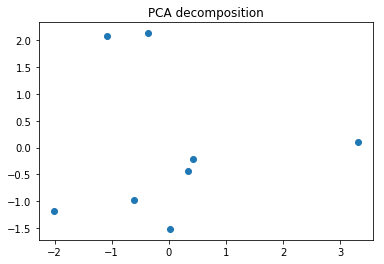

In [5]:
# STEP 3: PCA plot
pca = gs.Pca(X)
pca.fit()
pca.plot()

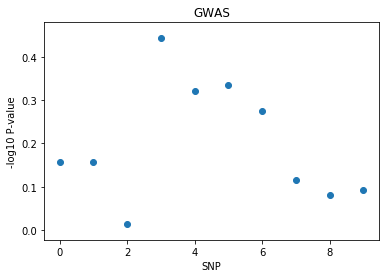

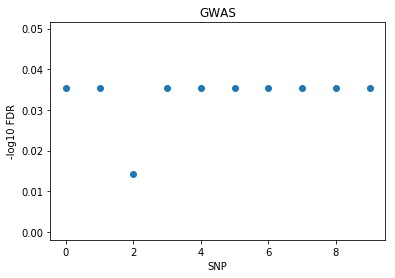

#SNP COEFF SE PVALUE FDR
1 -0.24193548387096775 0.5932210411030221 0.6975493055139498 0.9219696891660317
2 -0.24193548387096775 0.5932210411030221 0.6975493055139498 0.9219696891660317
3 0.02499999999999991 0.5918280296392413 0.967676418492773 0.967676418492773
4 0.5516129032258065 0.5576323766596886 0.3607612193352147 0.9219696891660317
5 0.3499999999999999 0.461692237558985 0.47711216720996774 0.9219696891660317
6 -0.4483870967741935 0.5728509130431771 0.4635499847602761 0.9219696891660317
7 -0.4071428571428572 0.6105645876123659 0.5296740972872283 0.9219696891660317
8 -0.1499999999999999 0.47940211606634453 0.7649546315292042 0.9219696891660317
9 -0.19333333333333347 0.8609383339210858 0.8297727202494286 0.9219696891660317
10 -0.17826086956521753 0.6943829000243675 0.8059723073700266 0.9219696891660317


In [6]:
# STEP 4: GWAS plot for first trait
itrait = 0
gwas = gs.GWAS(X=X)
gwas.fit(y=y[:,itrait])
gwas.plot() # pvalue
gwas.plot(fdr=True) # FDR
gwas.print() # prints gwas results

In [7]:
# STEP 5: Obtain inverse NRM
AI = gs.doAInverse(ped)
print(AI)

[[ 2.   0.5  0.   0.5  0.   0.  -1.  -1. ]
 [ 0.5  1.5  0.   0.   0.   0.  -1.   0. ]
 [ 0.   0.   2.   1.  -1.  -1.   0.   0. ]
 [ 0.5  0.   1.   2.5 -1.  -1.   0.  -1. ]
 [ 0.   0.  -1.  -1.   2.   0.   0.   0. ]
 [ 0.   0.  -1.  -1.   0.   2.   0.   0. ]
 [-1.  -1.   0.   0.   0.   0.   2.   0. ]
 [-1.   0.   0.  -1.   0.   0.   0.   2. ]]


In [8]:
# STEP 6: Predicting Breeding Values for first trait
itrait = 0
h2 = 0.3    # assumed h2

# BLUP evaluation when last 10 individuals have no phenotypes
# yids contains order of phenotyped individuals (0 is first individual)
# phenotyped individuals (all but last 10)
yids = np.arange(nind-10, dtype=np.int)
ebv_blup10 = gs.doEbv0(criterion='blup', X=X, y=y[:,itrait], yIds=yids, h2=h2, ped=ped)

# GBLUP, all individuals phenotyped
ebv_gblup = gs.doEbv0(criterion='gblup', X=X, y=y[:,itrait], h2=h2, nh=ploidy)

# Single Step evaluation assuming only last half of population is genotyped 
#    and all inds phenotyped but last 10 ones
# mkrids contains order of genotyped individuals
mkrids = np.arange(nind//2,nind, dtype=np.int)
Xss = X[:,mkrids]
ebv_sstep05 = gs.doEbv0(criterion='sstep', X=Xss,y=y[:,itrait],  
                        yIds=yids, mkrIds=mkrids, h2=h2, nh=ploidy, ped=ped)


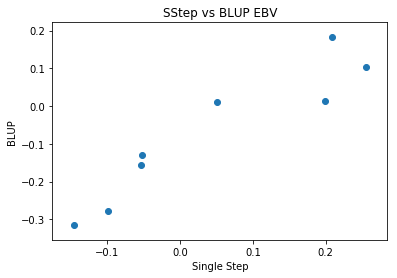

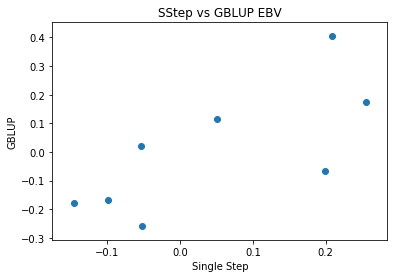

In [9]:
# Some plots
# plots
plt.scatter(ebv_sstep05, ebv_blup10)
plt.title('SStep vs BLUP EBV')
plt.xlabel('Single Step')
plt.ylabel('BLUP')
plt.show()
plt.close()

# plots
plt.scatter(ebv_sstep05, ebv_gblup)
plt.title('SStep vs GBLUP EBV')
plt.xlabel('Single Step')
plt.ylabel('GBLUP')
plt.show()
plt.close()
